In [6]:
#INVERSE KINEMATIC

import numpy as np
from scipy.optimize import minimize

# Given arm lengths
a1 = 0.85
a2 = 1.1

# Desired end effector position
desired_position = np.array([1.1, -0.7, 0])

# Objective function for optimization
def objective_function(theta):
    # Forward kinematics to calculate end effector position
    x_end = a1 * np.cos(theta[0]) + a2 * np.cos(theta[0] + theta[1])
    y_end = a1 * np.sin(theta[0]) + a2 * np.sin(theta[0] + theta[1])
    
    # Calculate the difference between the desired and actual end effector positions
    error = desired_position - np.array([x_end, y_end, 0])
    
    # Return the sum of squared errors
    return np.sum(error**2)

# Initial guess for joint angles
initial_guess = [0, 0]

# Perform the optimization
result = minimize(objective_function, initial_guess, method='L-BFGS-B')

# Extract the optimized joint angles
optimized_joint_angles = result.x

print("Optimized Joint Angles:")
print("Theta1:", np.degrees(optimized_joint_angles[0]))
print("Theta2:", np.degrees(optimized_joint_angles[1]))


Optimized Joint Angles:
Theta1: 24.36555291761301
Theta2: -97.14216131209581


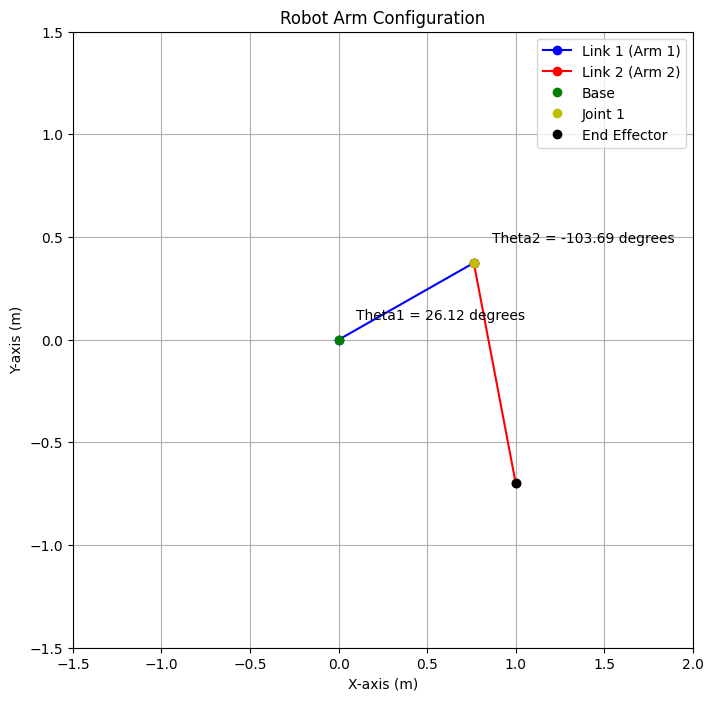

Calculated End Effector Position: (1.00, -0.70)


In [9]:
#FORWARD KINEMATIC

import matplotlib.pyplot as plt
import numpy as np

# Given arm lengths
a1 = 0.85
a2 = 1.1

# Calculated joint angles (in radians)
theta1 = np.radians(26.119529587567666)
theta2 = np.radians(-103.6877845186103)

# Forward kinematics to calculate end effector position
x_end = a1 * np.cos(theta1) + a2 * np.cos(theta1 + theta2)
y_end = a1 * np.sin(theta1) + a2 * np.sin(theta1 + theta2)

# Plot the robot arm with links
plt.figure(figsize=(8, 8))
plt.plot([0, a1*np.cos(theta1)], [0, a1*np.sin(theta1)], 'bo-', label='Link 1 (Arm 1)')
plt.plot([a1*np.cos(theta1), x_end], [a1*np.sin(theta1), y_end], 'ro-', label='Link 2 (Arm 2)')

# Plot the joint positions
plt.plot(0, 0, 'go', label='Base')
plt.plot(a1*np.cos(theta1), a1*np.sin(theta1), 'yo', label='Joint 1')
plt.plot(x_end, y_end, 'ko', label='End Effector')

# Annotate joint angles
plt.text(0.1, 0.1, f'Theta1 = {np.degrees(theta1):.2f} degrees', fontsize=10)
plt.text(a1*np.cos(theta1) + 0.1, a1*np.sin(theta1) + 0.1, f'Theta2 = {np.degrees(theta2):.2f} degrees', fontsize=10)

# Set axis limits
plt.xlim([-1.5, 2])
plt.ylim([-1.5, 1.5])

# Labeling the plot
plt.title('Robot Arm Configuration')
plt.xlabel('X-axis (m)')
plt.ylabel('Y-axis (m)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Print the calculated end effector position
print(f"Calculated End Effector Position: ({x_end:.2f}, {y_end:.2f})")

In [11]:
pip install python-docx

   ---------------------------------------- 0.0/239.6 kB ? eta -:--:--
   ----------------------- ---------------- 143.4/239.6 kB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 239.6/239.6 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.9 MB 9.9 MB/s eta 0:00:01
   -------- ------------------------------- 0.8/3.9 MB 10.4 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/3.9 MB 9.4 MB/s eta 0:00:01
   --------------- ------------------------ 1.5/3.9 MB 8.6 MB/s eta 0:00:01
   ----------------- ---------------------- 1.7/3.9 MB 7.9 MB/s eta 0:00:01
   ------------------- -------------------- 1.9/3.9 MB 7.0 MB/s eta 0:00:01
   --------------------- ------------------ 2.1/3.9 MB 6.6 MB/s eta 0:00:01
   ------------------------- -------------- 2.5/3.9 MB 6.8 MB/s eta 0:00:01
   ------------------------------ --------- 3.0/3.9 MB 7.6 MB/s eta 0:00:01
   ------------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from docx import Document
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
import numpy as np

# Given arm lengths
a1 = 0.85
a2 = 1.1

# Joint angles (in radians)
theta1 = np.radians(40.70943342730619)
theta2 = np.radians(-82.40779045773704)

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Denavit-Hartenberg (DH) Method Explanation', level=1)

# Add DH parameters explanation
doc.add_heading('DH Parameters:', level=2)
doc.add_paragraph("1. Joint 1 (between Frame 0 and Frame 1):")
doc.add_paragraph(f"- a1 = 0.85 m\n- alpha1 = 90 degrees (converted to radians)")
doc.add_paragraph("\n2. Joint 2 (between Frame 1 and Frame 2):")
doc.add_paragraph(f"- a2 = 1.1 m\n- alpha2 = 0 degrees (converted to radians)")

# Add Transformation matrices explanation
doc.add_heading('Transformation Matrices:', level=2)
doc.add_paragraph("1. Transformation matrix from Frame 0 to Frame 1 (T_0^1):")
doc.add_paragraph("T_0^1 = \n" + str(np.array([
    [np.cos(theta1), -np.sin(theta1), 0, 0],
    [np.sin(theta1), np.cos(theta1), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])))

doc.add_paragraph("\n2. Transformation matrix from Frame 1 to Frame 2 (T_1^2):")
doc.add_paragraph("T_1^2 = \n" + str(np.array([
    [np.cos(theta2), -np.sin(theta2), 0, a1],
    [np.sin(theta2), np.cos(theta2), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])))

doc.add_paragraph("\n3. Transformation matrix from Frame 2 to Frame 3 (T_2^3):")
doc.add_paragraph("T_2^3 = \n" + str(np.array([
    [1, 0, 0, a2],
    [0, 1, 0, -0.7],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])))

# Add Overall Transformation Matrix explanation
doc.add_heading('Overall Transformation Matrix:', level=2)
doc.add_paragraph("T_0^3 = T_0^1 * T_1^2 * T_2^3")

# Add Forward Kinematics explanation
doc.add_heading('Forward Kinematics:', level=2)
doc.add_paragraph("End Effector Position = T_0^3 * [0, 0, 0, 1]")

# Save the document with an absolute path or relative to the script
doc.save('DH_Method_Explanation_2.docx')


print("Document created successfully.")



Document created successfully.
